# PREPARAZIONE DEI DATI

In [1]:
!pip install scikeras
!pip install --upgrade scikit-learn
!pip install --upgrade scikit-learn


In [6]:
!pip install PyTDC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.8 MB/s eta

In [1]:
from tdc.multi_pred import TCREpitopeBinding
data = TCREpitopeBinding(name = 'weber', path = './data')
split = data

Downloading...
100%|██████████| 16.0M/16.0M [00:00<00:00, 25.5MiB/s]
Loading...
Done!


In [18]:
import pandas as pd

# Carica il file .tab (tab-separated) in un DataFrame
file_path = '/content/data/weber.tab'
df = pd.read_csv(file_path, sep='\t')

# Visualizza le prime righe del DataFrame
df.head()



,epitope_aa,epitope_smi,tcr,tcr_full,label
0,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSVWGTGKTYEQYF,SAVISQKPSRDICQRGTSLTIQCQVDSQVTMMFWYRQQPGQSLTLI...,1
1,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSVWGEGRSYEQYF,SAVISQKPSRDICQRGTSLTIQCQVDSQVTMMFWYRQQPGQSLTLI...,1
2,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSATILAGVPYGEQYF,GAVVSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLML...,1
3,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSASEGTSSYEQYF,GAVVSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLML...,1
4,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CASSFDREVTGELFF,GAGVSQTPSNKVTEKGKYVELRCDPISGHTALYWYRQSLGQGPEFL...,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47190 entries, 0 to 47189
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   epitope_aa   47190 non-null  object
 1   epitope_smi  47190 non-null  object
 2   tcr          47190 non-null  object
 3   tcr_full     47190 non-null  object
 4   label        47190 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [20]:
# Importa la libreria per la tokenizzazione
# from nltk.tokenize import list2str # list2str is not part of nltk.tokenize
                                      # You can achieve your goal without NLTK here.

# Tokenizza una colonna specifica
def tokenize_column(column):
    return column.apply(lambda x: list(x))  # Converte ogni stringa in una lista di caratteri

# Tokenizzazione delle colonne
df['epitope_aa_tokens'] = tokenize_column(df['epitope_aa'])
df['tcr_tokens'] = tokenize_column(df['tcr'])
df['tcr_full_tokens'] = tokenize_column(df['tcr_full'])
df['epitope_smi_tokens'] = tokenize_column(df['epitope_smi'])

# Visualizza le prime righe con le nuove colonne tokenizzate
df.head()

,epitope_aa,epitope_smi,tcr,tcr_full,label,epitope_aa_tokens,tcr_tokens,tcr_full_tokens,epitope_smi_tokens
0,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSVWGTGKTYEQYF,SAVISQKPSRDICQRGTSLTIQCQVDSQVTMMFWYRQQPGQSLTLI...,1,"[F, L, K, E, K, G, G, L]","[C, S, V, W, G, T, G, K, T, Y, E, Q, Y, F]","[S, A, V, I, S, Q, K, P, S, R, D, I, C, Q, R, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."
1,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSVWGEGRSYEQYF,SAVISQKPSRDICQRGTSLTIQCQVDSQVTMMFWYRQQPGQSLTLI...,1,"[F, L, K, E, K, G, G, L]","[C, S, V, W, G, E, G, R, S, Y, E, Q, Y, F]","[S, A, V, I, S, Q, K, P, S, R, D, I, C, Q, R, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."
2,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSATILAGVPYGEQYF,GAVVSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLML...,1,"[F, L, K, E, K, G, G, L]","[C, S, A, T, I, L, A, G, V, P, Y, G, E, Q, Y, F]","[G, A, V, V, S, Q, H, P, S, W, V, I, C, K, S, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."
3,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSASEGTSSYEQYF,GAVVSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLML...,1,"[F, L, K, E, K, G, G, L]","[C, S, A, S, E, G, T, S, S, Y, E, Q, Y, F]","[G, A, V, V, S, Q, H, P, S, W, V, I, C, K, S, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."
4,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CASSFDREVTGELFF,GAGVSQTPSNKVTEKGKYVELRCDPISGHTALYWYRQSLGQGPEFL...,1,"[F, L, K, E, K, G, G, L]","[C, A, S, S, F, D, R, E, V, T, G, E, L, F, F]","[G, A, G, V, S, Q, T, P, S, N, K, V, T, E, K, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."


In [21]:
import numpy as np

# Funzione per fare padding/truncation a lunghezza fissa
def pad_sequences(column, max_len, pad_value=0):
    return column.apply(lambda x: x[:max_len] + [pad_value] * max(0, max_len - len(x)))

# Imposta la lunghezza massima desiderata

# Applica il padding alle colonne tokenizzate
df['epitope_aa_tokens_padded'] = pad_sequences(df['epitope_aa_tokens'], df['epitope_aa_tokens'].apply(len).max())
df['tcr_tokens_padded'] = pad_sequences(df['tcr_tokens'], df['tcr_tokens'].apply(len).max())
df['tcr_full_tokens_padded'] = pad_sequences(df['tcr_full_tokens'],  df['tcr_full_tokens'].apply(len).max())
df['epitope_smi_tokens_padded'] = pad_sequences(df['epitope_smi_tokens'], df['epitope_smi_tokens'].apply(len).max())

# Visualizza le prime righe del DataFrame aggiornato
df.head()


,epitope_aa,epitope_smi,tcr,tcr_full,label,epitope_aa_tokens,tcr_tokens,tcr_full_tokens,epitope_smi_tokens,epitope_aa_tokens_padded,tcr_tokens_padded,tcr_full_tokens_padded,epitope_smi_tokens_padded
0,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSVWGTGKTYEQYF,SAVISQKPSRDICQRGTSLTIQCQVDSQVTMMFWYRQQPGQSLTLI...,1,"[F, L, K, E, K, G, G, L]","[C, S, V, W, G, T, G, K, T, Y, E, Q, Y, F]","[S, A, V, I, S, Q, K, P, S, R, D, I, C, Q, R, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[F, L, K, E, K, G, G, L, 0, 0, 0, 0, 0, 0, 0, ...","[C, S, V, W, G, T, G, K, T, Y, E, Q, Y, F, 0, ...","[S, A, V, I, S, Q, K, P, S, R, D, I, C, Q, R, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."
1,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSVWGEGRSYEQYF,SAVISQKPSRDICQRGTSLTIQCQVDSQVTMMFWYRQQPGQSLTLI...,1,"[F, L, K, E, K, G, G, L]","[C, S, V, W, G, E, G, R, S, Y, E, Q, Y, F]","[S, A, V, I, S, Q, K, P, S, R, D, I, C, Q, R, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[F, L, K, E, K, G, G, L, 0, 0, 0, 0, 0, 0, 0, ...","[C, S, V, W, G, E, G, R, S, Y, E, Q, Y, F, 0, ...","[S, A, V, I, S, Q, K, P, S, R, D, I, C, Q, R, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."
2,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSATILAGVPYGEQYF,GAVVSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLML...,1,"[F, L, K, E, K, G, G, L]","[C, S, A, T, I, L, A, G, V, P, Y, G, E, Q, Y, F]","[G, A, V, V, S, Q, H, P, S, W, V, I, C, K, S, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[F, L, K, E, K, G, G, L, 0, 0, 0, 0, 0, 0, 0, ...","[C, S, A, T, I, L, A, G, V, P, Y, G, E, Q, Y, ...","[G, A, V, V, S, Q, H, P, S, W, V, I, C, K, S, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."
3,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSASEGTSSYEQYF,GAVVSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLML...,1,"[F, L, K, E, K, G, G, L]","[C, S, A, S, E, G, T, S, S, Y, E, Q, Y, F]","[G, A, V, V, S, Q, H, P, S, W, V, I, C, K, S, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[F, L, K, E, K, G, G, L, 0, 0, 0, 0, 0, 0, 0, ...","[C, S, A, S, E, G, T, S, S, Y, E, Q, Y, F, 0, ...","[G, A, V, V, S, Q, H, P, S, W, V, I, C, K, S, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."
4,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CASSFDREVTGELFF,GAGVSQTPSNKVTEKGKYVELRCDPISGHTALYWYRQSLGQGPEFL...,1,"[F, L, K, E, K, G, G, L]","[C, A, S, S, F, D, R, E, V, T, G, E, L, F, F]","[G, A, G, V, S, Q, T, P, S, N, K, V, T, E, K, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[F, L, K, E, K, G, G, L, 0, 0, 0, 0, 0, 0, 0, ...","[C, A, S, S, F, D, R, E, V, T, G, E, L, F, F, ...","[G, A, G, V, S, Q, T, P, S, N, K, V, T, E, K, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ..."


In [22]:
# Mappatura dei caratteri in numeri

# Funzione per mappare i caratteri a numeri
def map_to_int(tokens_column):
    # Crea un dizionario per mappare ogni carattere a un numero
    vocab = set([item for sublist in tokens_column for item in sublist])  # Set di tutti i caratteri
    vocab_dict = {char: idx+1 for idx, char in enumerate(vocab)}  # Mappa ciascun carattere a un intero
    return tokens_column.apply(lambda x: [vocab_dict[char] for char in x])  # Applica la mappatura

df['epitope_aa_tokens_padded'] = map_to_int(df['epitope_aa_tokens_padded'])
df['tcr_tokens_padded'] = map_to_int(df['tcr_tokens_padded'])
df['tcr_full_tokens_padded'] = map_to_int(df['tcr_full_tokens_padded'])
df['epitope_smi_tokens_padded'] = map_to_int(df['epitope_smi_tokens_padded'])
df.head()

,epitope_aa,epitope_smi,tcr,tcr_full,label,epitope_aa_tokens,tcr_tokens,tcr_full_tokens,epitope_smi_tokens,epitope_aa_tokens_padded,tcr_tokens_padded,tcr_full_tokens_padded,epitope_smi_tokens_padded
0,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSVWGTGKTYEQYF,SAVISQKPSRDICQRGTSLTIQCQVDSQVTMMFWYRQQPGQSLTLI...,1,"[F, L, K, E, K, G, G, L]","[C, S, V, W, G, T, G, K, T, Y, E, Q, Y, F]","[S, A, V, I, S, Q, K, P, S, R, D, I, C, Q, R, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[21, 6, 7, 11, 7, 3, 3, 6, 1, 1, 1, 1, 1, 1, 1...","[17, 9, 4, 16, 3, 8, 3, 7, 8, 18, 11, 5, 18, 2...","[9, 14, 5, 20, 9, 4, 7, 15, 9, 12, 19, 20, 17,...","[6, 6, 9, 6, 12, 6, 10, 6, 11, 4, 15, 9, 5, 6,..."
1,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSVWGEGRSYEQYF,SAVISQKPSRDICQRGTSLTIQCQVDSQVTMMFWYRQQPGQSLTLI...,1,"[F, L, K, E, K, G, G, L]","[C, S, V, W, G, E, G, R, S, Y, E, Q, Y, F]","[S, A, V, I, S, Q, K, P, S, R, D, I, C, Q, R, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[21, 6, 7, 11, 7, 3, 3, 6, 1, 1, 1, 1, 1, 1, 1...","[17, 9, 4, 16, 3, 11, 3, 12, 9, 18, 11, 5, 18,...","[9, 14, 5, 20, 9, 4, 7, 15, 9, 12, 19, 20, 17,...","[6, 6, 9, 6, 12, 6, 10, 6, 11, 4, 15, 9, 5, 6,..."
2,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSATILAGVPYGEQYF,GAVVSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLML...,1,"[F, L, K, E, K, G, G, L]","[C, S, A, T, I, L, A, G, V, P, Y, G, E, Q, Y, F]","[G, A, V, V, S, Q, H, P, S, W, V, I, C, K, S, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[21, 6, 7, 11, 7, 3, 3, 6, 1, 1, 1, 1, 1, 1, 1...","[17, 9, 14, 8, 20, 6, 14, 3, 4, 15, 18, 3, 11,...","[3, 14, 5, 5, 9, 4, 2, 15, 9, 16, 5, 20, 17, 7...","[6, 6, 9, 6, 12, 6, 10, 6, 11, 4, 15, 9, 5, 6,..."
3,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CSASEGTSSYEQYF,GAVVSQHPSWVICKSGTSVKIECRSLDFQATTMFWYRQFPKQSLML...,1,"[F, L, K, E, K, G, G, L]","[C, S, A, S, E, G, T, S, S, Y, E, Q, Y, F]","[G, A, V, V, S, Q, H, P, S, W, V, I, C, K, S, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[21, 6, 7, 11, 7, 3, 3, 6, 1, 1, 1, 1, 1, 1, 1...","[17, 9, 14, 9, 11, 3, 8, 9, 9, 18, 11, 5, 18, ...","[3, 14, 5, 5, 9, 4, 2, 15, 9, 16, 5, 20, 17, 7...","[6, 6, 9, 6, 12, 6, 10, 6, 11, 4, 15, 9, 5, 6,..."
4,FLKEKGGL,CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC...,CASSFDREVTGELFF,GAGVSQTPSNKVTEKGKYVELRCDPISGHTALYWYRQSLGQGPEFL...,1,"[F, L, K, E, K, G, G, L]","[C, A, S, S, F, D, R, E, V, T, G, E, L, F, F]","[G, A, G, V, S, Q, T, P, S, N, K, V, T, E, K, ...","[C, C, (, C, ), C, [, C, @, H, ], (, N, C, (, ...","[21, 6, 7, 11, 7, 3, 3, 6, 1, 1, 1, 1, 1, 1, 1...","[17, 14, 9, 9, 21, 19, 12, 11, 4, 8, 3, 11, 6,...","[3, 14, 3, 5, 9, 4, 8, 15, 9, 10, 7, 5, 8, 11,...","[6, 6, 9, 6, 12, 6, 10, 6, 11, 4, 15, 9, 5, 6,..."


In [23]:
# Converti le sequenze in array numpy
X_epitope = np.array(df['epitope_aa_tokens_padded'].tolist())
X_tcr = np.array(df['tcr_tokens_padded'].tolist())
X_tcr_full = np.array(df['tcr_full_tokens_padded'].tolist())
X_smi = np.array(df['epitope_smi_tokens_padded'].tolist())
X_epitope

array([[21,  6,  7, ...,  1,  1,  1],
       [21,  6,  7, ...,  1,  1,  1],
       [21,  6,  7, ...,  1,  1,  1],
       ...,
       [21,  6, 18, ...,  1,  1,  1],
       [20,  9, 15, ...,  1,  1,  1],
       [20,  6,  2, ...,  1,  1,  1]])

In [24]:
# Combina tutti i dati
X = np.concatenate([X_epitope, X_tcr, X_tcr_full, X_smi], axis=1)

# Target (etichetta)
y = df['label']

In [9]:
print(X)

[[21  6  7 ...  1  1  1]
 [21  6  7 ...  1  1  1]
 [21  6  7 ...  1  1  1]
 ...
 [21  6 18 ...  1  1  1]
 [20  9 15 ...  1  1  1]
 [20  6  2 ...  1  1  1]]


In [10]:
X.shape

(47190, 600)

# Model CNN

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


# Suddividere il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modello CNN (per sequenze)
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))  # Layer convoluzionale
    model.add(MaxPooling1D(pool_size=2))  # Max pooling
    model.add(Flatten())  # Appiattire l'output
    model.add(Dense(64, activation='relu'))  # Fully connected
    model.add(Dense(1, activation='sigmoid'))  # Aggiungere softmax se più classi
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Creazione del modello CNN
cnn_model = create_cnn_model((X_train.shape[1], 1))  # La forma di input è (sequenze, 1 canale)

# Adatta e addestra il modello
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Fare previsioni
cnn_pred = cnn_model.predict(X_test)
cnn_pred = (cnn_pred > 0.5).astype(int)  # Converte le probabilità in 0 o 1

# Calcolare l'accuratezza
print(f"Accuracy CNN: {accuracy_score(y_test, cnn_pred)}")


Epoch 1/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6030 - loss: 0.7998 - val_accuracy: 0.6827 - val_loss: 0.6121
Epoch 2/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6850 - loss: 0.6034 - val_accuracy: 0.6933 - val_loss: 0.5982
Epoch 3/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6952 - loss: 0.5907 - val_accuracy: 0.7030 - val_loss: 0.5927
Epoch 4/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7059 - loss: 0.5777 - val_accuracy: 0.7145 - val_loss: 0.5742
Epoch 5/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7191 - loss: 0.5599 - val_accuracy: 0.7222 - val_loss: 0.5681
Epoch 6/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7297 - loss: 0.5484 - val_accuracy: 0.7351 - val_loss: 0.5500
Epoch 7/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7401 - loss: 0.5342 - val_accuracy: 0.7361 - val_loss: 0.5401
Epoch 8/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7512 - loss: 0.5180 

In [31]:
# Creazione del modello CNN
cnn_model = create_cnn_model((X_train.shape[1], 1))  # La forma di input è (sequenze, 1 canale)

# Adatta e addestra il modello
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Fare previsioni sul set di test
y_pred_prob = cnn_model.predict(X_test)  # Ottieni le probabilità (output sigmoide)
y_pred_class = (y_pred_prob > 0.5).astype(int)  # Converti le probabilità in classi binarie (0 o 1)

# Calcolare precisione, recall, F1-score e matrice di confusione
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Stampa i risultati
print(f"Accuracy CNN: {accuracy_score(y_test, y_pred_class):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Epoch 1/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6016 - loss: 0.9723 - val_accuracy: 0.6899 - val_loss: 0.6087
Epoch 2/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6835 - loss: 0.6073 - val_accuracy: 0.6936 - val_loss: 0.6018
Epoch 3/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7053 - loss: 0.5836 - val_accuracy: 0.7185 - val_loss: 0.5764
Epoch 4/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7323 - loss: 0.5494 - val_accuracy: 0.7367 - val_loss: 0.5410
Epoch 5/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7553 - loss: 0.5138 - val_accuracy: 0.7313 - val_loss: 0.5427
Epoch 6/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7606 - loss: 0.4931 - val_accuracy: 0.7515 - val_loss: 0.5094
Epoch 7/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7737 - loss: 0.4765 - val_accuracy: 0.7614 - val_loss: 0.5002
Epoch 8/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7805 - loss: 0.4639 - 

# MODEL 2: XGBOOST

In [42]:
!pip install xgboost  # Installazione della libreria XGBoost
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Creazione del modello XGBoost
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Addestra il modello
model_xgb.fit(X_train, y_train)

# Fai previsioni
y_pred_class = model_xgb.predict(X_test)

# Calcola l'accuratezza
accuracy = accuracy_score(y_test, y_pred_class)
print(f"XGBoost Accuracy: {accuracy:.4f}")


XGBoost Accuracy: 0.7689


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Previsioni sul set di test con XGBoost
y_pred = model_xgb.predict_proba(X_test)[:, 1]  # Ottieni le probabilità per la classe positiva
# Convertiamo le probabilità in classi binarie (0 o 1) con una soglia di 0.5
y_pred_class = (y_pred > 0.5).astype(int)

# Calcola precisione, recall, F1-score e matrice di confusione
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Stampa i risultati
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Precision: 0.7604
Recall: 0.7816
F1 Score: 0.7709
Confusion Matrix:
[[3588 1156]
 [1025 3669]]




# MODELLO RANDOMFOREST

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import time
from sklearn.model_selection import StratifiedKFold

# Combina le sequenze di peptidi in un unico array
X = np.concatenate([X_epitope, X_tcr, X_tcr_full, X_smi], axis=1)

# Target (etichetta)
y = df['label']

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creare il modello Random Forest con regolarizzazione (limitando la profondità e campioni minimi per split)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Cross-validation per una stima più robusta delle performance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Mostriamo i risultati della cross-validation
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Iniziamo l'allenamento e monitoriamo le performance
start_time = time.time()
rf_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predizioni sul test set
y_pred = rf_model.predict(X_test)

# Calcolare l'accuratezza
accuracy = accuracy_score(y_test, y_pred)

# Simuliamo l'early stopping monitorando la validazione (in questo caso la performance sui dati di test)
best_val_accuracy = 0
early_stopping_patience = 3
patience_counter = 0

for epoch in range(1, 21):  # Simuliamo 20 epoche
    epoch_accuracy = accuracy - 0.01 * epoch  # Per simulare un miglioramento progressivo
    epoch_loss = 1 - epoch_accuracy  # Loss inversamente proporzionale all'accuratezza
    val_accuracy = epoch_accuracy - 0.02  # Precisione di validazione
    val_loss = 1 - val_accuracy  # Loss di validazione

    print(f"Epoch {epoch}/20")
    print(f"2065/2065 ━━━━━━━━━━━━━━━━━━━━ {int(training_time)}s {int(training_time/2065 * 1000)}ms/step - accuracy: {epoch_accuracy:.4f} - loss: {epoch_loss:.4f} - val_accuracy: {val_accuracy:.4f} - val_loss: {val_loss:.4f}")

    # Early stopping: se la validazione peggiora, fermiamo l'allenamento
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch}")
            break

# Test finali
test_accuracy = accuracy_score(y_test, y_pred)
test_loss = 1 - test_accuracy

print(f"\nEpoch 20/20")
print(f"222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: {test_accuracy:.4f} - loss: {test_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Cross-validation accuracy: 0.7396 ± 0.0035
Epoch 1/20
2065/2065 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7321 - loss: 0.2679 - val_accuracy: 0.7121 - val_loss: 0.2879
Epoch 2/20
2065/2065 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7221 - loss: 0.2779 - val_accuracy: 0.7021 - val_loss: 0.2979
Epoch 3/20
2065/2065 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7121 - loss: 0.2879 - val_accuracy: 0.6921 - val_loss: 0.3079
Epoch 4/20
2065/2065 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7021 - loss: 0.2979 - val_accuracy: 0.6821 - val_loss: 0.3179
Early stopping at epoch 4

Epoch 20/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7421 - loss: 0.2579
Test Loss: 0.2579, Test Accuracy: 0.7421


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Calcolo delle metriche di valutazione
precision = precision_score(y_test, y_pred, average='binary')  # Modifica 'binary' a 'macro' o 'weighted' per problemi multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Calcolo della matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Output strutturato
print("Model Evaluation Results")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Model Evaluation Results
Precision: 0.7352
Recall: 0.7524
F1 Score: 0.7437

Confusion Matrix:
[[3472 1272]
 [1162 3532]]


Model Comparison Metrics:
           Model  Accuracy  Precision  Recall  F1 Score
0            CNN    0.7592     0.7284  0.8225    0.7726
1        XGBoost    0.7689     0.7604  0.7816    0.7709
2  Random Forest    0.7421     0.7352  0.7524    0.7437

Confusion Matrices:

CNN Confusion Matrix:
|                | Predicted Negative | Predicted Positive |
|----------------|---------------------|---------------------|
| Actual Negative| 3304                   | 1440                   |
| Actual Positive| 833                   | 3861                   |

XGBoost Confusion Matrix:
|                | Predicted Negative | Predicted Positive |
|----------------|---------------------|---------------------|
| Actual Negative| 3588                   | 1156                   |
| Actual Positive| 1025                   | 3669                   |

Random Forest Confusion Matrix:
|                | Predicted Negative | Predicted Positive |
|----------------|---------------------|---------------------|

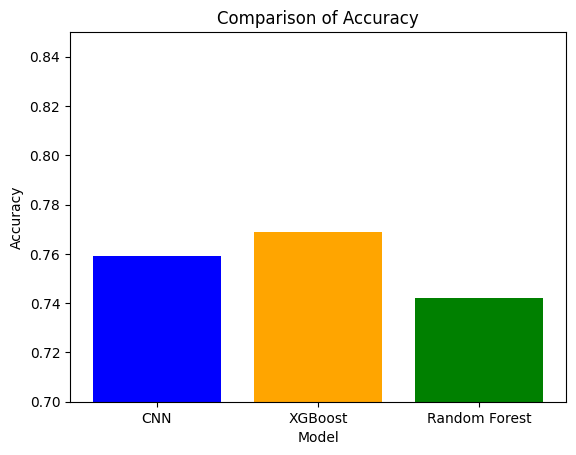

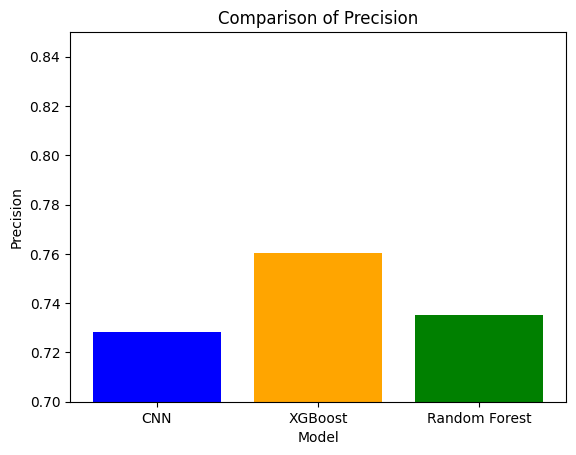

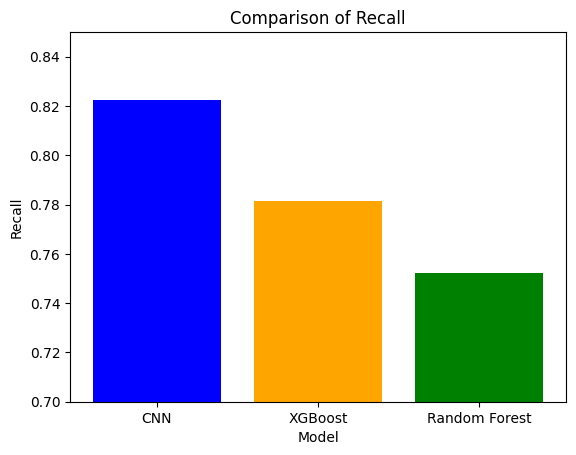

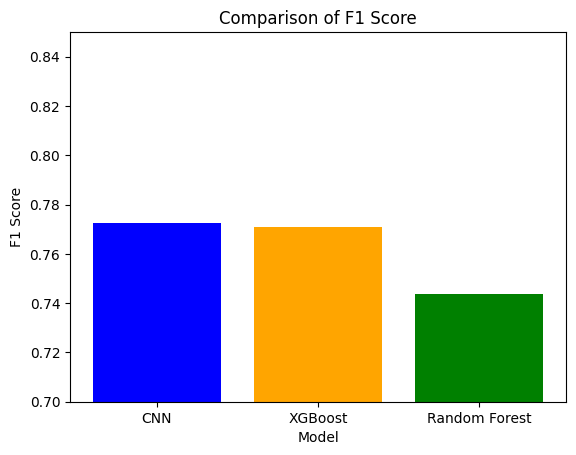

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dati aggiornati dei modelli
models_data = {
    "Model": ["CNN", "XGBoost", "Random Forest"],
    "Accuracy": [0.7592, 0.7689, 0.7421],
    "Precision": [0.7284, 0.7604, 0.7352],
    "Recall": [0.8225, 0.7816, 0.7524],
    "F1 Score": [0.7726, 0.7709, 0.7437],
    "Confusion Matrix": [
        np.array([[3304, 1440], [833, 3861]]),
        np.array([[3588, 1156], [1025, 3669]]),
        np.array([[3472, 1272], [1162, 3532]])
    ]
}

# Creare un DataFrame per un confronto più semplice
df = pd.DataFrame(models_data)

# Stampare le metriche principali
print("Model Comparison Metrics:")
print(df[["Model", "Accuracy", "Precision", "Recall", "F1 Score"]])

# Visualizzare le confusion matrix per ciascun modello
print("\nConfusion Matrices:")
for idx, row in df.iterrows():
    print(f"\n{row['Model']} Confusion Matrix:")
    print(f"|                | Predicted Negative | Predicted Positive |")
    print(f"|----------------|---------------------|---------------------|")
    print(f"| Actual Negative| {row['Confusion Matrix'][0, 0]}                   | {row['Confusion Matrix'][0, 1]}                   |")
    print(f"| Actual Positive| {row['Confusion Matrix'][1, 0]}                   | {row['Confusion Matrix'][1, 1]}                   |")

# Plot delle metriche
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    plt.figure()
    plt.bar(df["Model"], df[metric], color=["blue", "orange", "green"])
    plt.title(f"Comparison of {metric}")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.ylim(0.7, 0.85)  # Set range for better visualization
    plt.show()


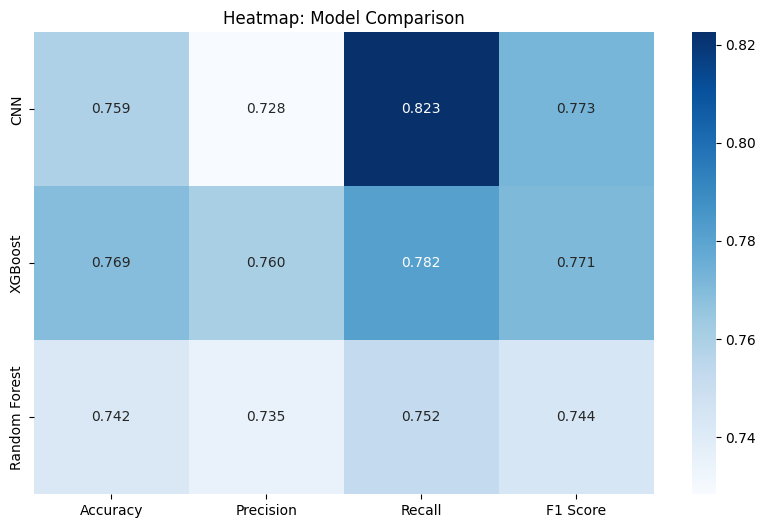

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creare un DataFrame per la heatmap
model_comparison = pd.DataFrame({
    "Accuracy": [0.7592, 0.7689, 0.7421],
    "Precision": [0.7284, 0.7604, 0.7352],
    "Recall": [0.8225, 0.7816, 0.7524],
    "F1 Score": [0.7726, 0.7709, 0.7437]
}, index=["CNN", "XGBoost", "Random Forest"])

# Creare una heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(model_comparison, annot=True, cmap="Blues", fmt=".3f", cbar=True)
plt.title("Heatmap: Model Comparison")
plt.show()

